In [74]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [77]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [78]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [79]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [82]:
# Find the most recent date in the data set.
most_recent = session.query(measurement).order_by(measurement.id.desc()).first()
final_date = most_recent.date
print(final_date)

2017-08-23


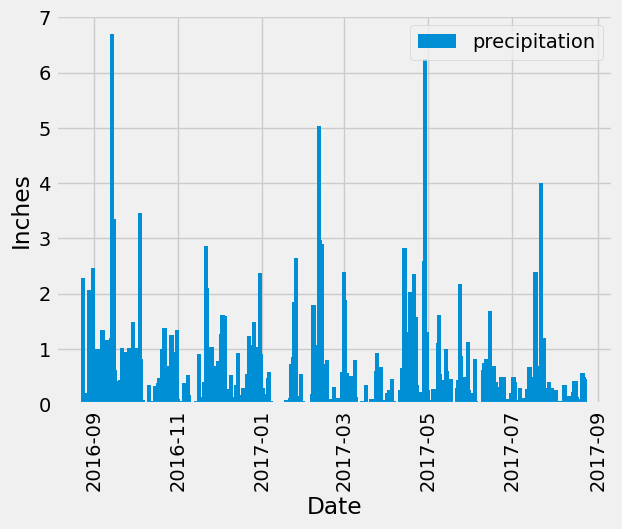

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
qry = session.query(measurement.date, measurement.prcp).filter(measurement.date <= '2017-08-23').\
        filter(measurement.date > '2016-08-23')

# Save the query results as a Pandas DataFrame and sort the dataframe by date
df = pd.read_sql(qry.statement, engine)
sorted_df = df.sort_values(by=['date'])
sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
x = np.asarray(sorted_df['date'], dtype='datetime64[s]')
plt.bar(x, sorted_df['prcp'], width=3.0)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'])
plt.show()


In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(measurement.station).distinct().count()
print(station_count)

9


In [86]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_query = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
hi_query = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
avg_query = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()

print(f'The lowest temperature is {low_query}.')
print(f'The highest temperature is {hi_query}.')
print(f'The average temperature is {avg_query}.')


The lowest temperature is 54.0.
The highest temperature is 85.0.
The average temperature is 71.66378066378067.


In [88]:
# Get one year of data using date found in first analysis
new_qry = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date <= '2017-08-23').\
        filter(measurement.date > '2016-08-23')
new_qry.all()

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

<function matplotlib.pyplot.show(close=None, block=None)>

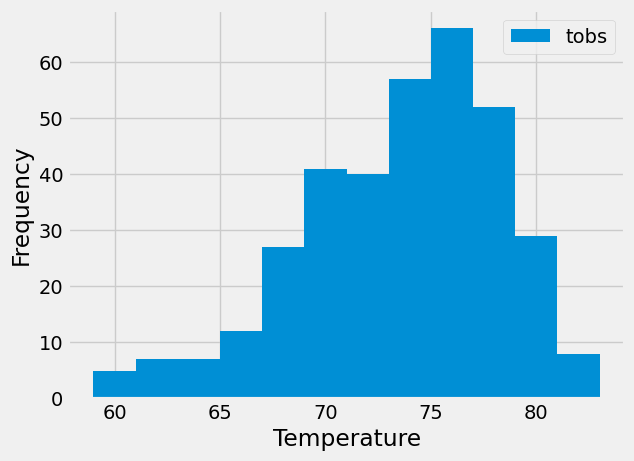

In [89]:
# Save the query results as a Pandas DataFrame
hist_df = pd.read_sql(new_qry.statement, engine)


# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(hist_df['tobs'], bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show


# Close session

In [90]:
# Close Session
session.close()